In [10]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv('ITE_Data Assessment_Dataset 1.csv')

In [3]:
example_good_date = '2010-02-27 00:00:00'

cleaned_df = df[df.date.str.len() == len(example_good_date)].dropna()

cleaned_df['date_time'] = cleaned_df.date.apply(lambda x: time.strptime(x, '%Y-%m-%d %H:%M:%S'))
cleaned_df['year'] = cleaned_df.date_time.apply(lambda x: f"{x.tm_year:04}").astype(int)
cleaned_df['month'] = cleaned_df.date_time.apply(lambda x: f"{x.tm_mon:02}")
cleaned_df['dt'] = (cleaned_df['year'].astype(str) + cleaned_df['month']).astype(int)
cleaned_df['day'] = cleaned_df.date_time.apply(lambda x: f"{x.tm_mday:02}")
cleaned_df['month'] = cleaned_df['month'].astype(int)

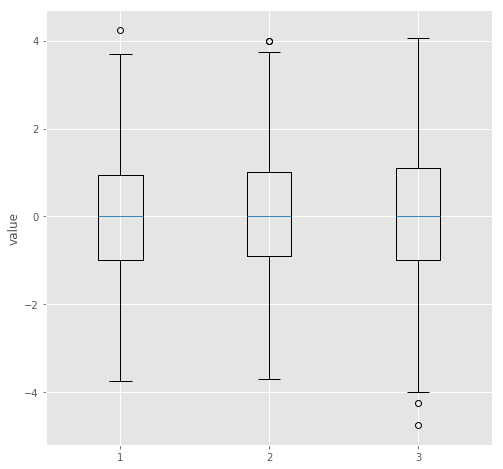

In [9]:
df_agged = cleaned_df.groupby(['variable', 'dt']).agg(np.mean).sort_index()
df_agged['change'] = df_agged.value - df_agged.value.shift(1)
 
plt.style.use('ggplot')
plt.figure(figsize = (8, 8))
plt.title('')
plt.ylabel('value')

variables = ['type1', 'type2', 'type3']
plt.boxplot([df_agged[df_agged.index.get_level_values(0) == variable].change.dropna() for variable in variables])

plt.show()